In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
try:
    # Intentar leer el archivo localmente
    data = pd.read_csv('../data/Steel_industry_data.csv')
except FileNotFoundError:
    # Si no se encuentra, leer desde la URL
    data = pd.read_csv('https://raw.githubusercontent.com/luis-huacho/INF648-Proy-Curso-2024-01/main/data/Steel_industry_data.csv')

# Seleccionar las columnas para la regresión
features = data.drop(columns=['date', 'Usage_kWh'])
target = data['Usage_kWh']

In [3]:
categorical_features = features[['WeekStatus', 'Day_of_week', 'Load_Type']]

In [4]:
numerical_features = features.drop(columns=categorical_features)

In [5]:
numerical_features.head(n=3)

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
0,2.95,0.0,0.0,73.21,100.0,900
1,4.46,0.0,0.0,66.77,100.0,1800
2,3.28,0.0,0.0,70.28,100.0,2700


In [6]:
X_categorical = pd.get_dummies(categorical_features, columns=["Day_of_week", "Load_Type", "WeekStatus"], drop_first=False)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_numerical = scaler.fit_transform(numerical_features)
X_numerical_ = pd.DataFrame(X_numerical, columns=numerical_features.columns)

In [8]:
X_numerical_.head(n=3)

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
0,-0.618516,-0.521385,-0.71355,-0.389410,0.513268,-1.678015
1,-0.525911,-0.521385,-0.71355,-0.729772,0.513268,-1.641929
2,-0.598278,-0.521385,-0.71355,-0.544264,0.513268,-1.605843


In [9]:
X = pd.concat([X_numerical_, X_categorical], axis=1)

In [10]:
X.head(n=3)

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Light_Load,Load_Type_Maximum_Load,Load_Type_Medium_Load,WeekStatus_Weekday,WeekStatus_Weekend
0,-0.618516,-0.521385,-0.71355,-0.389410,0.513268,-1.678015,False,True,False,False,False,False,False,True,False,False,True,False
1,-0.525911,-0.521385,-0.71355,-0.729772,0.513268,-1.641929,False,True,False,False,False,False,False,True,False,False,True,False
2,-0.598278,-0.521385,-0.71355,-0.544264,0.513268,-1.605843,False,True,False,False,False,False,False,True,False,False,True,False


In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4).fit(X)
pca_loadings = pca.components_

In [12]:
pd.DataFrame(pca_loadings, columns=X.columns, index=['PC1', 'PC2', 'PC3', 'PC4'])

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Light_Load,Load_Type_Maximum_Load,Load_Type_Medium_Load,WeekStatus_Weekday,WeekStatus_Weekend
PC1,0.352219,-0.547728,0.287281,-0.299885,0.550595,-0.255178,0.019973,0.020714,-0.038905,-0.060544,0.024336,0.021027,0.013399,0.019091,0.052324,-0.071416,0.099449,-0.099449
PC2,0.440939,0.073559,0.534907,0.478228,-0.054099,0.416703,0.012596,0.012167,-0.024754,-0.042105,0.015978,0.013998,0.012120,-0.253688,0.126472,0.127216,0.066859,-0.066859
PC3,-0.331068,-0.231833,-0.223644,-0.206567,0.276036,0.733216,0.036661,0.037864,-0.068698,-0.093719,0.030808,0.031779,0.025305,-0.160943,-0.018691,0.179634,0.162417,-0.162417
PC4,-0.031379,-0.225454,0.060194,0.019778,0.138912,0.255015,-0.109699,-0.111933,0.297536,0.258916,-0.103952,-0.107838,-0.123030,0.025829,0.091643,-0.117472,-0.556452,0.556452


In [13]:
pca_scores = pca.transform(X)

In [14]:
pca_scores

array([[ 0.78578518, -1.74005354, -0.51645047, -0.67304896],
       [ 0.91126356, -1.84695341, -0.45034252, -0.67348388],
       [ 0.82093503, -1.77511064, -0.43824478, -0.65834157],
       ...,
       [-0.12541986, -0.24872129,  1.90018442,  0.1837133 ],
       [-0.15775117, -0.20842439,  1.91543759,  0.19297146],
       [ 0.72742422, -1.65111644, -0.59047632, -0.68041158]])

In [15]:
explained_variance = pca.explained_variance_
print('Varianza explicada por cada componente principal:')
print(explained_variance)

Varianza explicada por cada componente principal:
[2.92888738 2.41753284 0.59435778 0.46669834]


In [16]:
PVE = pca.explained_variance_ratio_

print('Proporción de varianza explicada (PVE) por cada componente principal:')
print(PVE)

Proporción de varianza explicada (PVE) por cada componente principal:
[0.37172345 0.30682424 0.07543367 0.05923161]


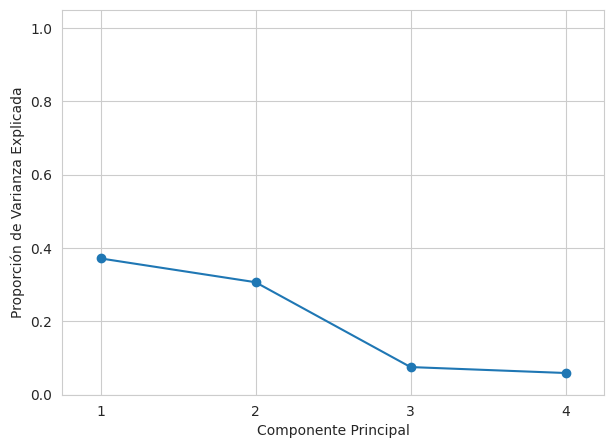

In [17]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o')
plt.ylabel('Proporción de Varianza Explicada')
plt.xlabel('Componente Principal')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.show()

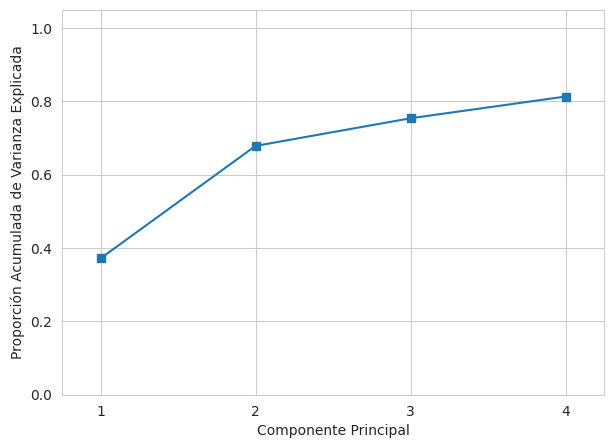

In [18]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-s')
plt.ylabel('Proporción Acumulada de Varianza Explicada')
plt.xlabel('Componente Principal')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.show()

In [19]:
# Visualizamos los puntajes para los primeros estados
X_plot = pd.DataFrame(pca_scores, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
X_plot.shape

(35040, 4)

In [20]:
X_plot.sample(n=5)

,PC1,PC2,PC3,PC4
12081,-3.444318,0.199251,-0.326080,0.705281
30627,1.241887,-2.230362,-0.240019,-0.677083
28196,-3.244520,-0.005752,-0.633467,0.613141
21546,1.622767,1.986563,-0.719323,-0.120746
27711,1.353875,1.772733,0.060462,0.032906


In [21]:
X_rec = np.dot(pca_scores, pca_loadings)
X_rec_ = pd.DataFrame(X_rec, index=X.index, columns=X.columns).sample(n=8)

In [22]:
X_rec_.head(n=3)

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Light_Load,Load_Type_Maximum_Load,Load_Type_Medium_Load,WeekStatus_Weekday,WeekStatus_Weekend
16788,-1.033989,1.871352,-0.679957,1.377080,-1.916135,1.383789,-0.124668,-0.128806,0.291378,0.334189,-0.135372,-0.126873,-0.109847,-0.225598,-0.057271,0.282869,-0.625567,0.625567
6826,-0.413323,-0.469482,-0.718263,-1.135092,0.480353,-1.274639,0.054280,0.056879,-0.155500,-0.116527,0.049639,0.052372,0.058856,0.495805,-0.235761,-0.260045,0.272027,-0.272027
9169,-0.742413,1.945454,-0.674687,1.042867,-1.859182,0.301481,0.065376,0.065402,-0.228884,-0.116791,0.048819,0.062130,0.103947,-0.103521,-0.218843,0.322363,0.345674,-0.345674


In [23]:
X_rec_numerical_ = X_rec_[numerical_features.columns]

In [24]:
recovered_data = scaler.inverse_transform(X_rec_numerical_)
recovered_X = pd.DataFrame(recovered_data, columns=numerical_features.columns)

In [25]:
recovered_X.head(n=3)

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
0,-3.824603,17.764531,0.000543,106.633867,26.009860,77261.948507
1,6.295832,0.385345,-0.000076,59.100912,98.997555,10960.268136
2,0.929777,18.314694,0.000628,100.310204,27.744439,50268.998463
